<a href="https://colab.research.google.com/github/ngoan22mse23088/GraduationThesis/blob/master/yolo_lung.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ultralytics

from google.colab import drive
drive.mount('/content/drive')

import warnings
warnings.filterwarnings('ignore')

import os
import shutil
import matplotlib.pyplot as plt
import numpy as pd
from tqdm.auto import tqdm
import yaml
import torch

In [ ]:
import os

train_path = '/content/gdrive/MyDrive/Xray/train'
val_path = '/content/gdrive/MyDrive/Xray/val'

# Kiểm tra thư mục train
if os.path.exists(train_path):
    print(f"Thư mục {train_path} tồn tại")
    print("Nội dung thư mục train:", os.listdir(train_path))
else:
    print(f"Thư mục {train_path} không tồn tại")

# Kiểm tra thư mục val
if os.path.exists(val_path):
    print(f"Thư mục {val_path} tồn tại")
    print("Nội dung thư mục val:", os.listdir(val_path))
else:
    print(f"Thư mục {val_path} không tồn tại")


Thư mục /content/gdrive/MyDrive/Xray/train không tồn tại
Thư mục /content/gdrive/MyDrive/Xray/val không tồn tại


In [ ]:
import os

# Đường dẫn tới thư mục chứa các ảnh trong lớp 'Normal'
image_dir = '/content/drive/MyDrive/Xray/train/Tuberculosis'
label_dir = '/content/drive/MyDrive/Xray/labels'

# Tạo thư mục labels nếu chưa có
if not os.path.exists(label_dir):
    os.makedirs(label_dir)

# Duyệt qua các tệp trong thư mục Normal
image_files = os.listdir(image_dir)

# Tạo nhãn cho mỗi ảnh
for image_file in image_files:
    # Bỏ qua các tệp không phải ảnh (có thể lọc theo đuôi tệp .jpg, .png, ...)
    if image_file.endswith(('.jpg', '.png')):
        # Tạo tên tệp nhãn dựa trên tên ảnh (thay đuôi tệp bằng .txt)
        label_file = os.path.splitext(image_file)[0] + ".txt"
        label_path = os.path.join(label_dir, label_file)

        # Nội dung nhãn cho lớp 'Normal' là 0 (vì lớp Normal có index là 0)
        with open(label_path, 'w') as label:
            label.write("0 0.5 0.5 1 1\n")  # Ví dụ nhãn giả định: class 0, bounding box chiếm toàn ảnh
            # Bạn có thể thay đổi toạ độ của bounding box tuỳ vào trường hợp cụ thể

        print(f"Created label for {image_file}: {label_path}")


In [ ]:
import yaml
from ultralytics import YOLO
import torch

# Kiểm tra xem có GPU không
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Cấu hình dữ liệu
dataset_config = {
    'path': '/content/drive/MyDrive/Xray',  # Thư mục gốc của dataset
    'train': 'images',                      # Thư mục chứa ảnh train
    'val': 'images',                          # Thư mục chứa ảnh val
    'names': {0: 'Normal', 1: 'Tuberculosis'},  # Tên các lớp
    'nc': 2                                # Số lượng lớp
}

# Lưu cấu hình vào file dataset.yaml
yaml_file_path = '/content/dataset2.yaml'
with open(yaml_file_path, 'w') as file:
    yaml.dump(dataset_config, file)

# Load mô hình YOLOv8 và chuyển mô hình sang GPU nếu có
model = YOLO('yolov8n.pt')

# Nếu có GPU thì chuyển mô hình sang half precision để tăng tốc độ
if torch.cuda.is_available():
    model.to(device)  # Chuyển mô hình sang GPU
    model.half()  # Sử dụng tính năng half precision

# Bắt đầu quá trình huấn luyện
results = model.train(
    data='/content/dataset2.yaml',  # Đường dẫn đến file cấu hình dataset
    batch=16,                      # Kích thước batch
    epochs=100,                    # Số lượng epoch
    imgsz=640,                     # Kích thước ảnh
    device=device                  # Thiết bị để chạy (GPU hoặc CPU)
)

# Đảm bảo mô hình đã được chuyển sang GPU nếu có
model.to(device)

100%|██████████| 6.25M/6.25M [00:00<00:00, 77.9MB/s]


engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/dataset2.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=cuda, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=None, format=torchscript, keras=False, optimize=False, int8=False, 

100%|██████████| 755k/755k [00:00<00:00, 14.8MB/s]


Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /content/drive/MyDrive/Xray/labels.cache... 4426 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4426/4426 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/drive/MyDrive/Xray/labels.cache... 4426 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4426/4426 [00:00<?, ?it/s]


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      2.19G      0.384     0.9253      1.125         26        640: 100%|██████████| 277/277 [02:26<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 139/139 [00:30<00:00,  4.49it/s]


                   all       4426       4426      0.989      0.991      0.994      0.923

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      2.21G     0.2973     0.4191      1.034         29        640: 100%|██████████| 277/277 [00:44<00:00,  6.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 139/139 [00:28<00:00,  4.86it/s]


                   all       4426       4426      0.995      0.997      0.995      0.914

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      2.21G     0.2791     0.3307      1.012         32        640: 100%|██████████| 277/277 [00:43<00:00,  6.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 139/139 [00:28<00:00,  4.85it/s]

                   all       4426       4426      0.998      0.999      0.995       0.97



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      2.17G     0.2504      0.292     0.9955         26        640: 100%|██████████| 277/277 [00:42<00:00,  6.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 139/139 [00:27<00:00,  5.00it/s]

                   all       4426       4426      0.998          1      0.995      0.971



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      2.19G     0.2267     0.2568     0.9773         38        640: 100%|██████████| 277/277 [00:42<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 139/139 [00:27<00:00,  5.05it/s]

                   all       4426       4426      0.993          1      0.995      0.959



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      2.17G     0.2108     0.2418     0.9692         31        640: 100%|██████████| 277/277 [00:43<00:00,  6.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 139/139 [00:28<00:00,  4.91it/s]

                   all       4426       4426      0.919       0.97      0.974      0.894



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      2.17G     0.1911     0.2247     0.9584         33        640: 100%|██████████| 277/277 [00:42<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 139/139 [00:27<00:00,  4.97it/s]

                   all       4426       4426      0.999          1      0.995      0.977



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      2.17G     0.1871     0.2167     0.9539         32        640: 100%|██████████| 277/277 [00:43<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 139/139 [00:28<00:00,  4.90it/s]

                   all       4426       4426      0.997      0.999      0.995      0.984



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      2.19G     0.1647      0.196     0.9436         38        640: 100%|██████████| 277/277 [00:42<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 139/139 [00:27<00:00,  5.06it/s]

                   all       4426       4426      0.999      0.999      0.995      0.976



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      2.17G     0.1673     0.1912     0.9512         30        640: 100%|██████████| 277/277 [00:43<00:00,  6.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 139/139 [00:28<00:00,  4.94it/s]

                   all       4426       4426      0.999          1      0.995      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      2.17G     0.1602     0.1894     0.9447         35        640: 100%|██████████| 277/277 [00:43<00:00,  6.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 139/139 [00:28<00:00,  4.94it/s]

                   all       4426       4426      0.998          1      0.995      0.986



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      2.17G     0.1563     0.1881      0.939         30        640: 100%|██████████| 277/277 [00:42<00:00,  6.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 139/139 [00:27<00:00,  5.06it/s]

                   all       4426       4426          1          1      0.995      0.975



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      2.19G     0.1481     0.1824     0.9365         35        640: 100%|██████████| 277/277 [00:42<00:00,  6.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 139/139 [00:27<00:00,  5.05it/s]

                   all       4426       4426          1      0.999      0.995      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      2.17G     0.1348     0.1698       0.93         32        640: 100%|██████████| 277/277 [00:43<00:00,  6.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 139/139 [00:28<00:00,  4.87it/s]

                   all       4426       4426      0.999      0.998      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      2.17G     0.1394     0.1686       0.93         30        640: 100%|██████████| 277/277 [00:42<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 139/139 [00:27<00:00,  5.05it/s]

                   all       4426       4426          1          1      0.995      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      2.17G     0.1312     0.1583     0.9257         26        640: 100%|██████████| 277/277 [00:42<00:00,  6.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 139/139 [00:27<00:00,  5.08it/s]

                   all       4426       4426          1          1      0.995      0.955



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      2.19G     0.1301     0.1583     0.9276         30        640: 100%|██████████| 277/277 [00:42<00:00,  6.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 139/139 [00:27<00:00,  5.12it/s]

                   all       4426       4426      0.999          1      0.995      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      2.17G     0.1264     0.1575     0.9244         34        640: 100%|██████████| 277/277 [00:42<00:00,  6.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 139/139 [00:26<00:00,  5.19it/s]

                   all       4426       4426      0.999          1      0.995      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      2.17G     0.1202     0.1531     0.9237         28        640: 100%|██████████| 277/277 [00:42<00:00,  6.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 139/139 [00:27<00:00,  5.08it/s]

                   all       4426       4426          1          1      0.995      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      2.17G     0.1216     0.1524     0.9214         33        640: 100%|██████████| 277/277 [00:42<00:00,  6.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 139/139 [00:27<00:00,  5.01it/s]

                   all       4426       4426      0.998      0.999      0.995      0.983



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      2.19G     0.1184     0.1501     0.9221         31        640: 100%|██████████| 277/277 [00:42<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 139/139 [00:26<00:00,  5.26it/s]

                   all       4426       4426          1          1      0.995      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      2.17G     0.1146     0.1505     0.9169         31        640: 100%|██████████| 277/277 [00:42<00:00,  6.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 139/139 [00:27<00:00,  5.12it/s]

                   all       4426       4426      0.999          1      0.995      0.991



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      2.17G     0.1116     0.1474     0.9181         22        640: 100%|██████████| 277/277 [00:42<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 139/139 [00:26<00:00,  5.17it/s]

                   all       4426       4426          1          1      0.995      0.991



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      2.17G     0.1144     0.1475     0.9206         27        640: 100%|██████████| 277/277 [00:42<00:00,  6.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 139/139 [00:27<00:00,  5.12it/s]

                   all       4426       4426          1          1      0.995      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      2.19G     0.1137     0.1474     0.9162         29        640: 100%|██████████| 277/277 [00:42<00:00,  6.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 139/139 [00:26<00:00,  5.15it/s]

                   all       4426       4426          1          1      0.995      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      2.17G     0.1125     0.1442     0.9236         36        640: 100%|██████████| 277/277 [00:42<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 139/139 [00:26<00:00,  5.18it/s]

                   all       4426       4426      0.999      0.999      0.995       0.99



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      2.17G     0.1124     0.1429     0.9168         23        640: 100%|██████████| 277/277 [00:42<00:00,  6.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 139/139 [00:26<00:00,  5.18it/s]

                   all       4426       4426      0.998      0.999      0.995       0.99



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      2.17G     0.1067     0.1399     0.9176         33        640: 100%|██████████| 277/277 [00:42<00:00,  6.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 139/139 [00:26<00:00,  5.24it/s]

                   all       4426       4426      0.998      0.999      0.995      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      2.19G     0.1079      0.136     0.9183         34        640: 100%|██████████| 277/277 [00:42<00:00,  6.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 139/139 [00:26<00:00,  5.18it/s]

                   all       4426       4426      0.999      0.998      0.995      0.989



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      2.17G    0.09895     0.1311     0.9099         30        640: 100%|██████████| 277/277 [00:42<00:00,  6.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 139/139 [00:27<00:00,  5.13it/s]

                   all       4426       4426      0.997      0.999      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      2.17G    0.09873      0.133     0.9102         36        640: 100%|██████████| 277/277 [00:42<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 139/139 [00:27<00:00,  5.03it/s]

                   all       4426       4426          1          1      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      2.17G     0.0974     0.1308     0.9164         30        640: 100%|██████████| 277/277 [00:42<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 139/139 [00:27<00:00,  5.06it/s]

                   all       4426       4426          1          1      0.995      0.992



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      2.19G     0.0934     0.1251     0.9091         28        640: 100%|██████████| 277/277 [00:42<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 139/139 [00:26<00:00,  5.20it/s]

                   all       4426       4426          1          1      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      2.17G    0.09469     0.1262     0.9124         32        640: 100%|██████████| 277/277 [00:41<00:00,  6.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 139/139 [00:26<00:00,  5.21it/s]

                   all       4426       4426      0.999      0.999      0.995      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      2.17G     0.0927     0.1252     0.9081         34        640: 100%|██████████| 277/277 [00:42<00:00,  6.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 139/139 [00:26<00:00,  5.20it/s]

                   all       4426       4426          1          1      0.995      0.992



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      2.17G    0.09497     0.1239     0.9169         27        640: 100%|██████████| 277/277 [00:42<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 139/139 [00:26<00:00,  5.21it/s]

                   all       4426       4426          1          1      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      2.19G    0.09221     0.1242      0.913         31        640: 100%|██████████| 277/277 [00:42<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 139/139 [00:26<00:00,  5.22it/s]

                   all       4426       4426      0.999          1      0.995      0.991



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      2.17G     0.0934     0.1248     0.9133         31        640: 100%|██████████| 277/277 [00:41<00:00,  6.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 139/139 [00:26<00:00,  5.18it/s]

                   all       4426       4426          1          1      0.995      0.987



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      2.17G    0.09081     0.1235     0.9094         30        640: 100%|██████████| 277/277 [00:42<00:00,  6.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 139/139 [00:26<00:00,  5.17it/s]

                   all       4426       4426      0.999      0.999      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      2.17G    0.08985     0.1269     0.9089         35        640: 100%|██████████| 277/277 [00:42<00:00,  6.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 139/139 [00:26<00:00,  5.19it/s]

                   all       4426       4426          1          1      0.995      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      2.19G    0.08932     0.1227     0.9069         32        640: 100%|██████████| 277/277 [00:42<00:00,  6.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 139/139 [00:26<00:00,  5.21it/s]

                   all       4426       4426          1          1      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      2.17G    0.08534     0.1188     0.9057         25        640: 100%|██████████| 277/277 [00:41<00:00,  6.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 139/139 [00:26<00:00,  5.20it/s]

                   all       4426       4426          1          1      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      2.17G    0.08604       0.12     0.9066         31        640: 100%|██████████| 277/277 [00:42<00:00,  6.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 139/139 [00:26<00:00,  5.28it/s]

                   all       4426       4426          1          1      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      2.17G    0.08517      0.117     0.9035         27        640: 100%|██████████| 277/277 [00:42<00:00,  6.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 139/139 [00:26<00:00,  5.25it/s]

                   all       4426       4426          1          1      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      2.19G    0.08397     0.1154     0.9053         32        640: 100%|██████████| 277/277 [00:42<00:00,  6.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 139/139 [00:26<00:00,  5.15it/s]

                   all       4426       4426          1          1      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      2.17G    0.08302     0.1146     0.9061         26        640: 100%|██████████| 277/277 [00:42<00:00,  6.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 139/139 [00:27<00:00,  5.11it/s]

                   all       4426       4426          1          1      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      2.17G    0.08068     0.1125     0.9072         22        640: 100%|██████████| 277/277 [00:42<00:00,  6.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 139/139 [00:27<00:00,  5.09it/s]

                   all       4426       4426      0.999          1      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      2.17G    0.07964      0.113     0.9028         34        640: 100%|██████████| 277/277 [00:42<00:00,  6.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 139/139 [00:27<00:00,  5.12it/s]

                   all       4426       4426          1          1      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      2.19G    0.07915     0.1119     0.9064         29        640: 100%|██████████| 277/277 [00:42<00:00,  6.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 139/139 [00:27<00:00,  5.04it/s]

                   all       4426       4426      0.999      0.999      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      2.17G     0.0809     0.1121      0.907         30        640: 100%|██████████| 277/277 [00:42<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 139/139 [00:27<00:00,  5.03it/s]

                   all       4426       4426          1          1      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      2.17G    0.07521     0.1106     0.9038         31        640: 100%|██████████| 277/277 [00:43<00:00,  6.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 139/139 [00:27<00:00,  5.01it/s]

                   all       4426       4426          1          1      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      2.17G    0.07505     0.1061     0.9031         28        640: 100%|██████████| 277/277 [00:43<00:00,  6.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 139/139 [00:28<00:00,  4.94it/s]

                   all       4426       4426      0.998      0.999      0.995      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      2.19G    0.07406     0.1049     0.9018         28        640: 100%|██████████| 277/277 [00:42<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 139/139 [00:27<00:00,  4.99it/s]

                   all       4426       4426          1          1      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      2.17G    0.07294     0.1049     0.9049         28        640: 100%|██████████| 277/277 [00:43<00:00,  6.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 139/139 [00:27<00:00,  4.99it/s]

                   all       4426       4426          1          1      0.995      0.975



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      2.17G     0.0717     0.1054     0.9026         31        640: 100%|██████████| 277/277 [00:43<00:00,  6.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 139/139 [00:27<00:00,  4.99it/s]

                   all       4426       4426          1          1      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      2.17G    0.07304     0.1083     0.9052         31        640: 100%|██████████| 277/277 [00:43<00:00,  6.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 139/139 [00:28<00:00,  4.93it/s]

                   all       4426       4426          1          1      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      2.19G    0.07488     0.1068     0.9044         34        640: 100%|██████████| 277/277 [00:43<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 139/139 [00:27<00:00,  5.03it/s]

                   all       4426       4426          1          1      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      2.17G    0.07238     0.1054     0.9028         31        640: 100%|██████████| 277/277 [00:43<00:00,  6.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 139/139 [00:27<00:00,  5.02it/s]

                   all       4426       4426          1          1      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      2.17G    0.07143      0.104     0.9037         30        640: 100%|██████████| 277/277 [00:43<00:00,  6.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 139/139 [00:27<00:00,  5.03it/s]

                   all       4426       4426          1          1      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      2.17G    0.06979     0.1011     0.9012         30        640: 100%|██████████| 277/277 [00:42<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 139/139 [00:27<00:00,  5.03it/s]

                   all       4426       4426          1      0.999      0.995      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      2.19G    0.06696    0.09936     0.9018         33        640: 100%|██████████| 277/277 [00:42<00:00,  6.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 139/139 [00:27<00:00,  5.01it/s]

                   all       4426       4426          1          1      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      2.17G    0.06727    0.09709     0.9017         27        640: 100%|██████████| 277/277 [00:42<00:00,  6.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 139/139 [00:27<00:00,  5.04it/s]

                   all       4426       4426          1          1      0.995      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      2.17G    0.06735    0.09923     0.8987         28        640: 100%|██████████| 277/277 [00:42<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 139/139 [00:27<00:00,  5.04it/s]

                   all       4426       4426          1          1      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      2.17G    0.06282    0.09708     0.8986         31        640: 100%|██████████| 277/277 [00:42<00:00,  6.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 139/139 [00:27<00:00,  5.09it/s]

                   all       4426       4426          1          1      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      2.19G    0.06461    0.09571     0.9001         28        640: 100%|██████████| 277/277 [00:42<00:00,  6.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 139/139 [00:27<00:00,  5.08it/s]

                   all       4426       4426          1          1      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      2.17G    0.06353    0.09521     0.8985         30        640: 100%|██████████| 277/277 [00:42<00:00,  6.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 139/139 [00:27<00:00,  5.01it/s]

                   all       4426       4426          1          1      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      2.17G    0.06086    0.09677     0.8981         30        640: 100%|██████████| 277/277 [00:43<00:00,  6.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 139/139 [00:28<00:00,  4.90it/s]

                   all       4426       4426          1          1      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      2.17G    0.06172    0.09544     0.8968         27        640: 100%|██████████| 277/277 [00:43<00:00,  6.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 139/139 [00:28<00:00,  4.85it/s]

                   all       4426       4426      0.999      0.999      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      2.19G    0.05956    0.08902     0.9017         29        640: 100%|██████████| 277/277 [00:43<00:00,  6.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 139/139 [00:28<00:00,  4.92it/s]

                   all       4426       4426          1          1      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      2.17G    0.05875    0.09155     0.8971         30        640: 100%|██████████| 277/277 [00:43<00:00,  6.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 139/139 [00:27<00:00,  5.05it/s]

                   all       4426       4426      0.999      0.999      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      2.17G    0.05765    0.09044     0.9003         31        640: 100%|██████████| 277/277 [00:42<00:00,  6.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 139/139 [00:27<00:00,  5.06it/s]

                   all       4426       4426      0.999          1      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      2.17G    0.05894    0.09037     0.8991         34        640: 100%|██████████| 277/277 [00:42<00:00,  6.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 139/139 [00:27<00:00,  5.04it/s]

                   all       4426       4426          1          1      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      2.19G     0.0577    0.09014     0.8977         31        640: 100%|██████████| 277/277 [00:42<00:00,  6.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 139/139 [00:27<00:00,  5.13it/s]

                   all       4426       4426          1          1      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      2.17G    0.05751    0.09024     0.8977         33        640: 100%|██████████| 277/277 [00:42<00:00,  6.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 139/139 [00:27<00:00,  5.07it/s]

                   all       4426       4426          1          1      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      2.17G    0.05755    0.08986     0.8987         30        640: 100%|██████████| 277/277 [00:42<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 139/139 [00:27<00:00,  5.03it/s]

                   all       4426       4426          1          1      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      2.17G    0.05632    0.08678     0.8982         29        640: 100%|██████████| 277/277 [00:42<00:00,  6.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 139/139 [00:27<00:00,  5.08it/s]

                   all       4426       4426          1          1      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      2.19G    0.05578    0.08812     0.8971         25        640: 100%|██████████| 277/277 [00:42<00:00,  6.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 139/139 [00:27<00:00,  5.13it/s]

                   all       4426       4426      0.999          1      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      2.17G    0.05312    0.08473     0.8977         33        640: 100%|██████████| 277/277 [00:42<00:00,  6.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 139/139 [00:27<00:00,  5.12it/s]

                   all       4426       4426      0.998          1      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      2.17G    0.05366    0.08543     0.8968         34        640: 100%|██████████| 277/277 [00:42<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 139/139 [00:28<00:00,  4.89it/s]

                   all       4426       4426          1          1      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      2.17G    0.05354    0.08704     0.8992         28        640: 100%|██████████| 277/277 [00:43<00:00,  6.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 139/139 [00:28<00:00,  4.87it/s]

                   all       4426       4426      0.999          1      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      2.19G    0.05426    0.08687     0.8968         34        640: 100%|██████████| 277/277 [00:43<00:00,  6.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 139/139 [00:28<00:00,  4.89it/s]

                   all       4426       4426      0.998          1      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      2.17G    0.05284    0.08516     0.8949         34        640: 100%|██████████| 277/277 [00:43<00:00,  6.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 139/139 [00:28<00:00,  4.94it/s]

                   all       4426       4426      0.999          1      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      2.17G    0.05225    0.08409     0.8955         30        640: 100%|██████████| 277/277 [00:43<00:00,  6.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 139/139 [00:28<00:00,  4.89it/s]

                   all       4426       4426          1          1      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      2.17G     0.0526    0.08445     0.8952         30        640: 100%|██████████| 277/277 [00:43<00:00,  6.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 139/139 [00:28<00:00,  4.90it/s]

                   all       4426       4426          1          1      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      2.19G    0.05149    0.08274     0.8965         31        640: 100%|██████████| 277/277 [00:43<00:00,  6.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 139/139 [00:28<00:00,  4.93it/s]

                   all       4426       4426          1          1      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      2.17G    0.05041     0.0817     0.8939         31        640: 100%|██████████| 277/277 [00:42<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 139/139 [00:27<00:00,  5.11it/s]

                   all       4426       4426          1          1      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      2.17G    0.04851    0.08291     0.8948         33        640: 100%|██████████| 277/277 [00:42<00:00,  6.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 139/139 [00:27<00:00,  5.09it/s]

                   all       4426       4426          1          1      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      2.17G      0.046    0.07873     0.8919         30        640: 100%|██████████| 277/277 [00:42<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 139/139 [00:26<00:00,  5.20it/s]

                   all       4426       4426          1          1      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      2.19G    0.04485    0.07893      0.892         36        640: 100%|██████████| 277/277 [00:42<00:00,  6.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 139/139 [00:26<00:00,  5.18it/s]

                   all       4426       4426          1          1      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      2.17G    0.04595    0.07887     0.8927         32        640: 100%|██████████| 277/277 [00:42<00:00,  6.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 139/139 [00:26<00:00,  5.17it/s]

                   all       4426       4426      0.999          1      0.995      0.995


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      2.17G    0.03562     0.1267     0.9022         10        640: 100%|██████████| 277/277 [00:43<00:00,  6.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 139/139 [00:27<00:00,  5.07it/s]

                   all       4426       4426          1          1      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      2.17G    0.02566    0.03458      0.897         10        640: 100%|██████████| 277/277 [00:42<00:00,  6.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 139/139 [00:27<00:00,  5.05it/s]

                   all       4426       4426          1          1      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      2.19G    0.02327    0.03087     0.8958         10        640: 100%|██████████| 277/277 [00:42<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 139/139 [00:27<00:00,  5.10it/s]

                   all       4426       4426          1          1      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      2.17G     0.0216    0.02898     0.8993         10        640: 100%|██████████| 277/277 [00:43<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 139/139 [00:28<00:00,  4.89it/s]

                   all       4426       4426          1          1      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      2.17G    0.02029    0.02728     0.8971         10        640: 100%|██████████| 277/277 [00:43<00:00,  6.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 139/139 [00:28<00:00,  4.90it/s]

                   all       4426       4426          1          1      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      2.17G    0.01927    0.02616     0.9021         10        640: 100%|██████████| 277/277 [00:43<00:00,  6.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 139/139 [00:28<00:00,  4.88it/s]

                   all       4426       4426          1          1      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      2.19G    0.01894    0.02626     0.8972         10        640: 100%|██████████| 277/277 [00:43<00:00,  6.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 139/139 [00:28<00:00,  4.91it/s]

                   all       4426       4426          1          1      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      2.17G    0.01797     0.0247     0.8974         10        640: 100%|██████████| 277/277 [00:42<00:00,  6.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 139/139 [00:27<00:00,  5.01it/s]

                   all       4426       4426          1          1      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      2.17G    0.01771    0.02382     0.8956         10        640: 100%|██████████| 277/277 [00:42<00:00,  6.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 139/139 [00:27<00:00,  5.03it/s]

                   all       4426       4426          1          1      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      2.17G     0.0168    0.02286     0.8941         10        640: 100%|██████████| 277/277 [00:42<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 139/139 [00:27<00:00,  5.08it/s]

                   all       4426       4426          1          1      0.995      0.995



100 epochs completed in 2.003 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.3MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.2.98 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 139/139 [00:28<00:00,  4.86it/s]


                   all       4426       4426          1          1      0.995      0.995
                Normal       4426       4426          1          1      0.995      0.995
Speed: 0.2ms preprocess, 2.0ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to runs/detect/train


YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(16, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C2f(
        (cv1): Conv(
          (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(48, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_s

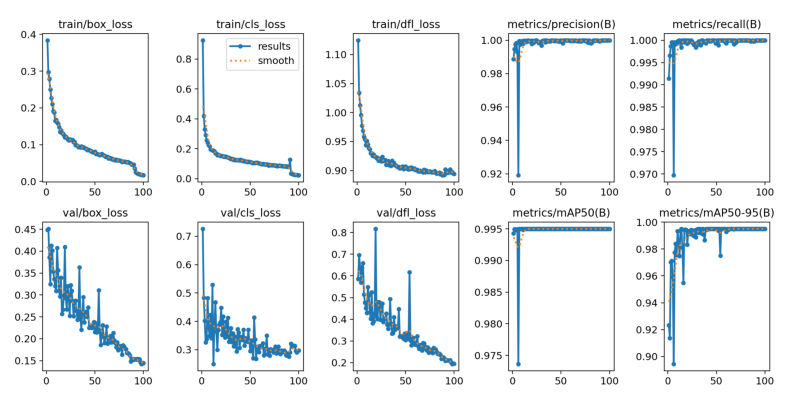

In [ ]:
result_img = plt.imread('./runs/detect/train/results.png')
plt.figure(figsize=(10, 10))
plt.imshow(result_img)
plt.axis('off')
plt.show()

In [ ]:
result_img = plt.imread('./runs/detect/train/val_batch0_labels.jpg')
plt.figure(figsize=(20, 20))
plt.imshow(result_img)
plt.axis('off')
plt.show()